In [60]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'

# True Solution

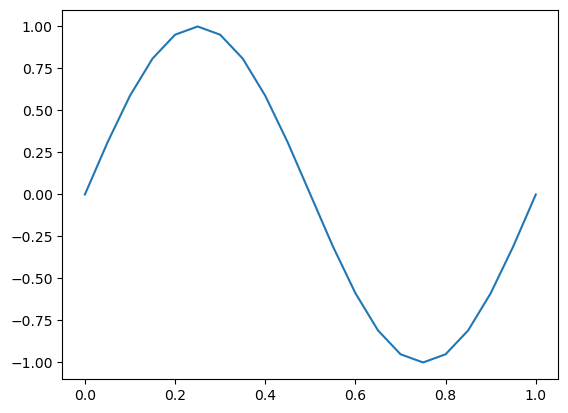

In [55]:
n = 21
L = 1
x = np.linspace(0, L, n)
dx = L/(n-1)

u0 = lambda x: np.sin(2*np.pi*x)
plt.plot(x, u0(x))

In [83]:
dt = 0.01
tend = 3.0
t = 0
c = -5 # wave speed
cfl = c * dt/dx

sol = []
sol.append(u0(x))

while t < tend:
    un = sol[-1]
    unew = un.copy()
    unew[1:-1] = un[1:-1] - cfl * (un[1:-1] - un[:-2])
    unew[-1] = un[-1] - cfl * (un[-1] - un[-2])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt

<IPython.core.display.Javascript object>


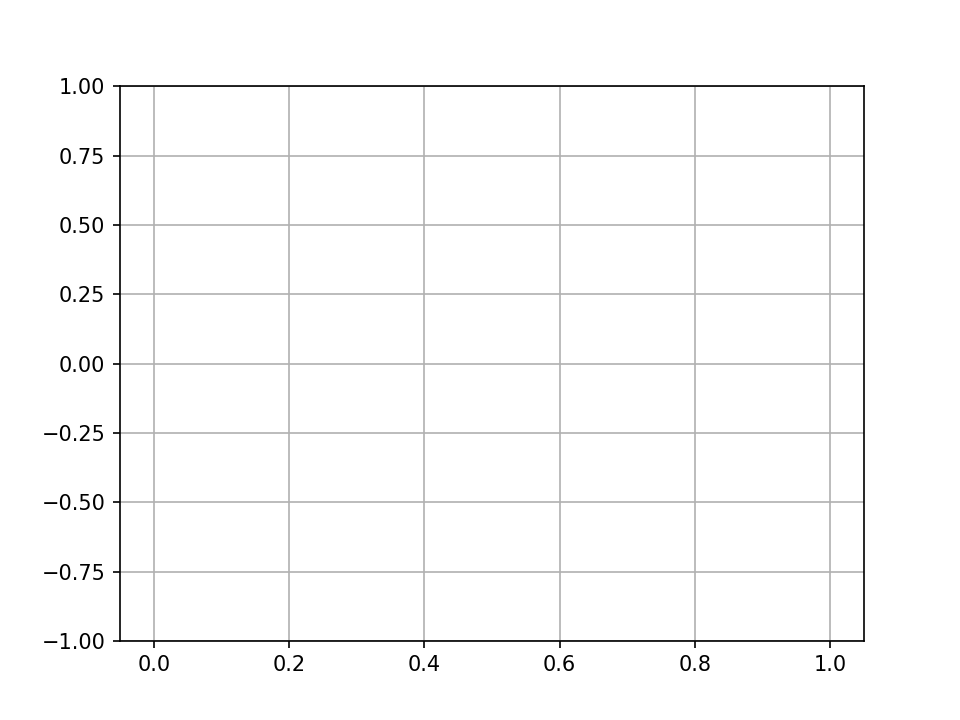

In [84]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution in sol:
    if (i%10 == 0):
        im = plt.plot(x, solution, 'ko', animated=True)
        plt.ylim(-1, 1)
        ims.append(im)
    i += 1

ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                   repeat_delay=1000)

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 21
L = 1
x = np.linspace(0, L, n)
dx = L/(n-1)

ω = 2*np.
mu = 0.05
c = 1 # Wave Speed
